In [1]:
from scipy.stats import mannwhitneyu
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
group1 = np.array([20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19])
group2 = np.array([24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23])

In [8]:
stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
print(stat)
print(p_value)

50.0
0.21138945901258455


### Descriptive Stats

In [20]:
temp = stats.describe(group1)

In [23]:
temp

DescribeResult(nobs=12, minmax=(17, 25), mean=21.0, variance=7.454545454545453, skewness=0.027991172768634366, kurtosis=-1.4187983343248067)

In [24]:
temp[2]

21.0

In [12]:
temp = np.quantile(group1, [0, 0.25,0.5,0.75, 1])
temp2 = np.quantile(group2, [0, 0.25,0.5,0.75, 1])

In [19]:
pd.DataFrame([temp,temp2], columns = ['Min','Lower Quartile','Median','Upper Quartile','Max'], index = ['Group1','Group2']).T

,Group1,Group2
Min,17.00,17.00
Lower Quartile,18.75,21.00
Median,20.50,23.00
Upper Quartile,23.25,24.25
Max,25.00,28.00


In [44]:
descriptive1 = stats.describe(group1)
descriptive2 = stats.describe(group2)
mode1 = stats.mode(group1)
mode2 = stats.mode(group2)
input_metrics1 = [descriptive1[0], 1, str(round((1/descriptive1[0])*100,1))+"%", descriptive1[2], mode1, descriptive1[3], descriptive1[3]**(0.5), descriptive1[4], descriptive1[5]]
input_metrics2 = [descriptive2[0], 0, str((0/descriptive2[0])*100)+"%", descriptive2[2], mode2, descriptive2[3], descriptive2[3]**(0.5), descriptive2[4], descriptive2[5]]

C:\Users\sionp\AppData\Local\Temp\ipykernel_35712\4059418124.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode1 = stats.mode(group1)
C:\Users\sionp\AppData\Local\Temp\ipykernel_35712\4059418124.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode2 = sta

In [46]:
pd.DataFrame([input_metrics1,input_metrics2], columns = ['Observations','Missing Count','Missing Percent','Mean','Mode','Variance','Standard Deviation','Skewness','Kurtosis'], index = ["Group1","Group2"]).T

,Group1,Group2
Observations,12,12
Missing Count,1,0
Missing Percent,8.3%,0.0%
Mean,21.0,22.75
Mode,"([18], [2])","([21], [2])"
Variance,7.454545,10.568182
Standard Deviation,2.730301,3.250874
Skewness,0.027991,-0.197955
Kurtosis,-1.418798,-0.568991


{'whiskers': [<matplotlib.lines.Line2D at 0x296532571f0>,
 'caps': [<matplotlib.lines.Line2D at 0x296532648b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29653264490>,
 'medians': [<matplotlib.lines.Line2D at 0x29653264df0>,
 'fliers': [<matplotlib.lines.Line2D at 0x296532760d0>,
 'means': []}

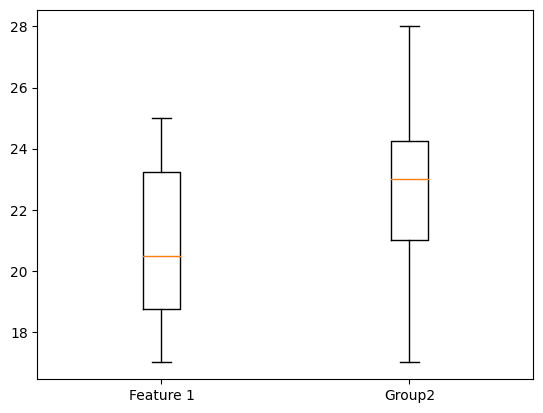

In [6]:
plt.boxplot([group1,group2], vert=True, labels=['Feature 1','Group2'])

In [21]:
#median
print(f"Ranked data: {stats.mode(group1)}")
#std

Ranked data: ModeResult(mode=array([18]), count=array([2]))


C:\Users\sionp\AppData\Local\Temp\ipykernel_23888\3725041721.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(f"Ranked data: {stats.mode(group1)}")


In [18]:
print(f"Ranked data: {stats.rankdata(group1)}")

Ranked data: [ 5.5  8.5  7.  12.   2.5  1.   2.5 10.5  5.5 10.5  8.5  4. ]


In [19]:
print(f"Shannon entropy: {stats.entropy(group1)}")

Shannon entropy: 2.4771361260714277


### Frequency Stats

(16.789473684210527, 25.2105263157895)

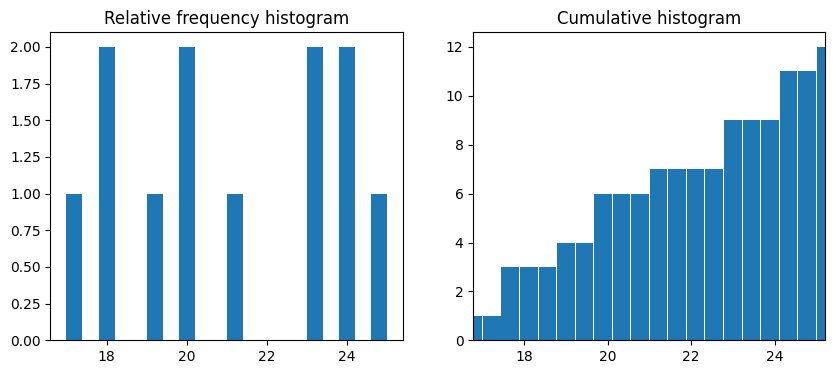

In [37]:
#cumulative frequency
bins = 20
res = stats.cumfreq(group1, numbins=bins)
x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size,
                                 res.cumcount.size)
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(group1, bins=bins)
ax1.set_title('Relative frequency histogram')
ax2.bar(x, res.cumcount, width=res.binsize)
ax2.set_title('Cumulative histogram')
ax2.set_xlim([x.min(), x.max()])

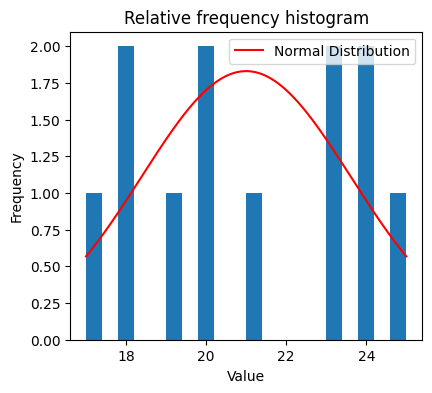

In [32]:
bins = 20
res = stats.cumfreq(group1, numbins=bins)
x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size,
                                 res.cumcount.size)
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(group1, bins=bins)
ax1.set_title('Relative frequency histogram')

x_normal = np.linspace(min(group1), max(group1), 1000) 
y_normal = stats.norm.pdf(x_normal, np.mean(group1), np.std(group1))*len(group1)
ax1.plot(x_normal, y_normal, color='red', label='Normal Distribution')
ax1.legend()
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
plt.show()

### Hypothesis Tests (One Sample)

One sample tests are typically used to assess whether a single sample was drawn from a specified distribution or a distribution with specified properties (e.g. zero mean).

In [32]:
#Suppose we wish to test the null hypothesis that the mean of a population is equal to 20.
#We choose a confidence level of 99%;
#that is, we will reject the null hypothesis in favor of the alternative if the p-value is less than 0.01.
popmean = 20
stats.ttest_1samp(group1, popmean=popmean)

Ttest_1sampResult(statistic=1.2687616393795076, pvalue=0.23071721010524696)

In [34]:
#A car manufacturer claims that no more than 10% of their cars are unsafe.
#15 cars are inspected for safety, 3 were found to be unsafe.
#Test the manufacturer’s claim:
stats.binomtest(3, n=15, p=0.1, alternative='greater')

BinomTestResult(k=3, n=15, alternative='greater', proportion_estimate=0.2, pvalue=0.18406106910639122)

In [36]:
#Because normal distributions have zero skewness,
#the magnitude of this statistic tends to be low for samples drawn from a normal distribution.
stats.skewtest(group1)

SkewtestResult(statistic=0.052913922904625196, pvalue=0.9578004910640951)

In [3]:
skew1 = stats.skewtest(group1)
kurtosis1 = stats.kurtosistest(group1)
normal1 = stats.normaltest(group1)
if len(group1) >= 2000:
    jb1 = stats.jarque_bera(group1)
shap1 = stats.shapiro(group1)

S:\ProgramData\Anaconda3\envs\scvi_destvi_x\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [4]:
import pandas as pd

In [7]:
skew2 = stats.skewtest(group2)
normal2 = stats.normaltest(group2)
shap2 = stats.shapiro(group2)

S:\ProgramData\Anaconda3\envs\scvi_destvi_x\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [10]:
norm_metrics1 = pd.DataFrame([skew1, normal1, shap1], index = ['Skew', 'Normal', 'Shapiro'])

In [11]:
norm_metrics2 = pd.DataFrame([skew2,normal2,shap2], index = ['Skew', 'Normal', 'Shapiro'])

In [15]:
concatenated_df = pd.concat([norm_metrics1, norm_metrics2], axis=1)

In [16]:
concatenated_df

,statistic,pvalue,statistic,pvalue
Skew,0.052914,0.957800,-0.373414,0.708841
Normal,2.793190,0.247438,0.143148,0.930927
Shapiro,0.928410,0.363564,0.969191,0.902151


In [17]:
concatenated_df.columns = pd.MultiIndex.from_tuples(
    [("Group1", "statistic"), ("Group1", "pvalue"),
     ("Group2", "statistic"), ("Group2", "pvalue")],
    names=["Group", "Metric"]
)

In [18]:
concatenated_df

Group      Group1              Group2          
Metric  statistic    pvalue statistic    pvalue
Skew     0.052914  0.957800 -0.373414  0.708841
Normal   2.793190  0.247438  0.143148  0.930927
Shapiro  0.928410  0.363564  0.969191  0.902151

In [37]:
#Suppose we wish to infer from measurements whether the weights of adult human males in a medical study are not normally distributed [2].
#The weights (lbs) are recorded in the array x below.
x = np.array([148, 154, 158, 160, 161, 162, 166, 170, 182, 195, 236])
stats.kurtosistest(x)

S:\ProgramData\Anaconda3\envs\scvi_destvi_x\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


KurtosistestResult(statistic=2.3048235214240873, pvalue=0.0211764592113868)

In [38]:
# It is based on D’Agostino and Pearson’s [1], [2] test that combines skew and kurtosis to produce an omnibus test of normality.
stats.normaltest(x)

NormaltestResult(statistic=13.034263121192582, pvalue=0.0014779023013100172)

In [39]:
#The Jarque-Bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution.
#Note that this test only works for a large enough number of data samples (>2000)
#as the test statistic asymptotically has a Chi-squared distribution with 2 degrees of freedom.
stats.jarque_bera(x)

Jarque_beraResult(statistic=6.982848237344646, pvalue=0.030457466224581897)

In [40]:
#The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
stats.shapiro(x)

ShapiroResult(statistic=0.7888147830963135, pvalue=0.006703833118081093)

In [43]:
#The Anderson-Darling test tests the null hypothesis that a sample is drawn from a population that follows a particular distribution.
#For the Anderson-Darling test, the critical values depend on which distribution is being tested against.
#This function works for normal, exponential, logistic, weibull_min, or Gumbel (Extreme Value Type I) distributions.
#‘norm’, ‘expon’, ‘logistic’, ‘gumbel’, ‘gumbel_l’, ‘gumbel_r’, ‘extreme1’, ‘weibull_min’}
print(f"Normal distribution test: {stats.anderson(x, dist='norm')}")
print(f"Exponential distribution test: {stats.anderson(x, dist='expon')}")
print(f"Logistic distribution test: {stats.anderson(x, dist='logistic')}")
print(f"Gumbel distribution test: {stats.anderson(x, dist='gumbel')}")
print(f"Gumbel extreme value distribution test: {stats.anderson(x, dist='extreme1')}")

Normal distribution test: AndersonResult(statistic=0.9467718795988862, critical_values=array([0.498, 0.567, 0.68 , 0.793, 0.944]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Exponential distribution test: AndersonResult(statistic=3.993905827607856, critical_values=array([0.874, 1.022, 1.272, 1.523, 1.856]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Logistic distribution test: AndersonResult(statistic=0.6879580717834308, critical_values=array([0.417, 0.55 , 0.645, 0.752, 0.886, 0.988]), significance_level=array([25. , 10. ,  5. ,  2.5,  1. ,  0.5]))
Gumbel distribution test: AndersonResult(statistic=1.367592706640556, critical_values=array([0.447, 0.601, 0.714, 0.827, 0.979]), significance_level=array([25. , 10. ,  5. ,  2.5,  1. ]))
Gumbel extreme value distribution test: AndersonResult(statistic=1.367592706640556, critical_values=array([0.447, 0.601, 0.714, 0.827, 0.979]), significance_level=array([25. , 10. ,  5. ,  2.5,  1. ]))


In [44]:
#This performs a test of the goodness of fit of a cumulative distribution function (cdf) 
#compared to the empirical distribution function of observed random variates that are assumed to be independent and identically distributed
stats.cramervonmises(x, 'norm')   #here the distribution can be any in scipy.stats

CramerVonMisesResult(statistic=3.666666666666667, pvalue=0)

In [46]:
#Performs the one-sample Kolmogorov-Smirnov test for goodness of fit.
#This test compares the underlying distribution F(x) of a sample against a given continuous distribution G(x).
stats.ks_1samp(x, stats.norm.cdf)   #here the distribution can be any in scipy.stats
#KS is often recommended

KstestResult(statistic=1.0, pvalue=0.0)

In [51]:
#The chi-square test tests the null hypothesis that the categorical data has the given frequencies.#
f_exp = np.array([44, 24, 29, 3]) / 100 * 189
f_obs = np.array([43, 52, 54, 40])
stats.chisquare(f_obs=f_obs, f_exp=f_exp)

Power_divergenceResult(statistic=228.23515947653874, pvalue=3.329558533884649e-49)

In [52]:
#This function tests the null hypothesis that the categorical data has the given frequencies,
#using the Cressie-Read power divergence statistic.
stats.power_divergence(f_obs=f_obs, f_exp=f_exp)

Power_divergenceResult(statistic=228.23515947653874, pvalue=3.329558533884649e-49)

### Hypothesis Tests (Paired samples)

In [53]:
#This is a test for the null hypothesis that two related or repeated samples have identical average (expected) values.
stats.ttest_rel(group1, group2)

Ttest_relResult(statistic=-2.2444115437169927, pvalue=0.04634164859760412)

In [54]:
#The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution.
#In particular, it tests whether the distribution of the differences x - y is symmetric about zero.
#It is a non-parametric version of the paired T-test.
stats.wilcoxon(group1, group2)

S:\ProgramData\Anaconda3\envs\scvi_destvi_x\lib\site-packages\scipy\stats\_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=10.5, pvalue=0.044065400736826854)

### Association / Correlation Tests

In [ ]:
alternative = 'two-sided'
metrics_out = []
index_out = ['Pearson R','Linear Regression']
metrics_out.append(stats.pearsonr(group1, group2, alternative = alternative))
temp = stats.linregress(group1, group2, alternative = alternative)
metrics_out.append((temp[2],temp[3]))

In [7]:
alternative = 'two-sided'
metrics_out = []
index_out = ['Spearman R','Siegel Slopes','Thiel Slopes']
metrics_out.append(stats.spearmanr(group1, group2, alternative = alternative))
metrics_out.append(stats.siegelslopes(group1, group2, alternative = alternative))   #like linear regression, but ignores outliers
metrics_out.append(stats.thielslopes(group1, group2, alternative = alternative))

0.03741819363309834

In [ ]:
temp

In [9]:
#2nd group option
temp = stats.siegelslopes(group1, group2)
temp

SiegelslopesResult(slope=0.6125, intercept=7.156249999999998)

In [57]:
#The Pearson correlation coefficient [1] measures the linear relationship between two datasets.
#Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y.
#Negative correlations imply that as x increases, y decreases.
#assumes normality
#alternative{‘two-sided’, ‘greater’, ‘less’}, optional
#Defines the alternative hypothesis. Default is ‘two-sided’. The following options are available:
#‘two-sided’: the correlation is nonzero
#‘less’: the correlation is negative (less than zero)
#‘greater’: the correlation is positive (greater than zero)
stats.pearsonr(group1, group2, alternative = 'two-sided')

PearsonRResult(statistic=0.6042944487169029, pvalue=0.03741819363309839)

In [58]:
#The Spearman rank-order correlation coefficient is a
#nonparametric measure of the monotonicity of the relationship between two datasets.
stats.spearmanr(group1, group2, alternative = 'two-sided')

SpearmanrResult(correlation=0.5238946258830546, pvalue=0.08041483727916385)

In [63]:
#The point biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y.
#Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation.
#Correlations of -1 or +1 imply a determinative relationship.
binary = np.array([0,1,0,1,0,1,0,1,0,1,0,1])
stats.pointbiserialr(binary, group1)

PointbiserialrResult(correlation=0.38254602783800307, pvalue=0.2197146058870111)

In [64]:
#Kendall’s tau is a measure of the correspondence between two rankings.
#Values close to 1 indicate strong agreement, and values close to -1 indicate strong disagreement.
#This implements two variants of Kendall’s tau: tau-b (the default) and tau-c (also known as Stuart’s tau-c).
#These differ only in how they are normalized to lie within the range -1 to 1;
#the hypothesis tests (their p-values) are identical.
stats.kendalltau(stats.rankdata(group1), stats.rankdata(group2))

KendalltauResult(correlation=0.44801433668816465, pvalue=0.050989245552752346)

In [65]:
#Perform Page’s Test, a measure of trend in observations between treatments.
# Page’s Test (also known as Page’s L test) is useful when:
#there are n>=3 treatments,
# m>=2 subjects are observed for each treatment, and
# the observations are hypothesized to have a particular order.
table = [[3, 4, 3],
         [2, 2, 4],
         [3, 3, 5],
         [1, 3, 2],
         [2, 3, 2],
         [2, 4, 5],
         [1, 2, 4],
         [3, 4, 4],
         [2, 4, 5],
         [1, 3, 4]]
stats.page_trend_test(table)

PageTrendTestResult(statistic=133.5, pvalue=0.0018191161948127822, method='exact')

In [67]:
#Specifically, for each point, MGC finds the 
#-nearest neighbors for one property (e.g. cloud density), and the 
#-nearest neighbors for the other property (e.g. grass wetness) [1]. This pair is called the “scale”.
#A priori, however, it is not know which scales will be most informative.
#So, MGC computes all distance pairs, and then efficiently computes the distance correlations for all scales.
#The local correlations illustrate which scales are relatively informative about the relationship.
#The key, therefore, to successfully discover and decipher relationships between disparate data modalities is to
#adaptively determine which scales are the most informative, and the geometric implication for the most informative scales.
#Doing so not only provides an estimate of whether the modalities are related,
#but also provides insight into how the determination was made.
#This is especially important in high-dimensional data, where simple visualizations do not reveal relationships to the unaided human eye.
stats.multiscale_graphcorr(group1, group2)

MGCResult(stat=0.2360151561890471, pvalue=0.08091908091908091, mgc_dict={'mgc_map': array([[0.19185285, 0.28602497, 0.2518996 , 0.24732196, 0.24862416,
        0.16041522, 0.16643329, 0.17424689, 0.16418518],
       [0.17118654, 0.3116986 , 0.30009847, 0.2858222 , 0.28703863,
        0.15946294, 0.11389175, 0.14971676, 0.16944862],
       [0.19750607, 0.36343037, 0.33101681, 0.3135615 , 0.2857166 ,
        0.17261897, 0.08055129, 0.13154217, 0.16790128],
       [0.20216724, 0.36477298, 0.31735506, 0.30209427, 0.27728128,
        0.10904881, 0.03091771, 0.08174282, 0.12299274],
       [0.20475527, 0.36924123, 0.30661134, 0.25501252, 0.2293996 ,
        0.05670138, 0.00356529, 0.03807131, 0.06784444],
       [0.20119337, 0.34605723, 0.28819082, 0.27332675, 0.24814625,
        0.09216183, 0.02094429, 0.06258639, 0.16673937],
       [0.20146937, 0.32082322, 0.26840464, 0.24893448, 0.21541354,
        0.08391331, 0.01546718, 0.13961871, 0.24445396],
       [0.20149299, 0.32476147, 0.2804687